In [ ]:
import pandas as pd
import random
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
nltk.download('stopwords')

ENGLISH_STOPWORDS = stopwords.words('english')
PUNCTUATIONS = string.punctuation
LEMMATIZER = WordNetLemmatizer()
STEMMER = PorterStemmer()

dataset = []
comments = ""
classifier = 0
list_words = []
labeled = []

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Data Collection & Data Pre-Processing

nltk.download('punkt')
nltk.download('wordnet')

def init():
    data_komentar = pd.read_csv("comments.csv")

    Data = data_komentar.iloc[:, :].values

    random.shuffle(Data)

    print(Data)

    global list_words
    global labeled
    for d in Data:
        try:
            sentences = d[0].lower()
        except:
            continue

        words = word_tokenize(sentences)
        words = [word for word in words if word not in ENGLISH_STOPWORDS]
        words = [LEMMATIZER.lemmatize(word) for word in words]
        words = [word for word in words if word not in PUNCTUATIONS]
        words = [word for word in words if word.isalpha()]
        for w in words:
            list_words.append(w)

        # Ubah label 0 menjadi "negative" dan 1 menjadi "positive"
        if d[1] == 0:
            label = "negative"
        elif d[1] == 1:
            label = "positive"
        else:
            continue

        labeled.append((d[0], label))

    fd = FreqDist(list_words)
    list_words = [word for word, count in fd.most_common(100)]

init()

if not list_words:
    raise ValueError("The vocabulary is empty. Please check the preprocessing steps.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


[['Which TV Female Friend Group Do You Belong In' 1]
 ['The New "Star Wars: The Force Awakens" Trailer Is Here To Give You Chills'
  1]
 ['The New "Star Wars: The Force Awakens" Trailer Is Here To Give You Chills'
  1]
 ...
 ['30 Things You Might Not Know About Emilie De Ravin' 1]
 ['Taking the Wheel as Toyota Skids' 0]
 ['We Know Your Age And Relationship Status Based On Your Chinese Zodiac'
  1]]


In [ ]:
# Ekstrak fitur menggunakan TfidVectorizer

tfidf_vectorizer = TfidfVectorizer(vocabulary=list_words)
X = tfidf_vectorizer.fit_transform([text for text, label in labeled]).toarray()
y = [label for text, label in labeled]

In [ ]:
# Pisahkan data menjadi Training Set dan Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training Model SVM

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Prediksi Set Tes

y_pred = model.predict(X_test)

In [ ]:
# Evaluasi Model

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.848125
              precision    recall  f1-score   support

    negative       0.90      0.01      0.02       980
    positive       0.85      1.00      0.92      5420

    accuracy                           0.85      6400
   macro avg       0.87      0.50      0.47      6400
weighted avg       0.86      0.85      0.78      6400



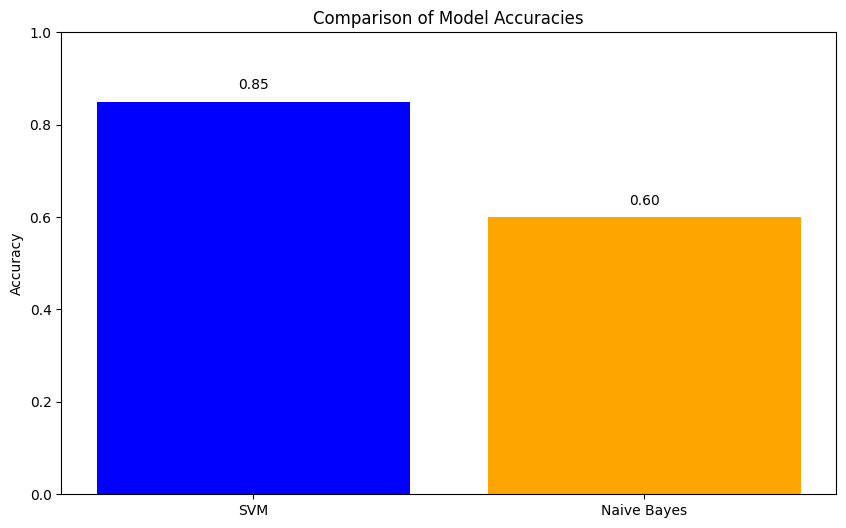

In [ ]:
# Grafik perbandingan

import matplotlib.pyplot as plt

accuracy_svm = 0.85
accuracy_nb = 0.60

labels = ['SVM', 'Naive Bayes']
accuracies = [accuracy_svm, accuracy_nb]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

plt.show()

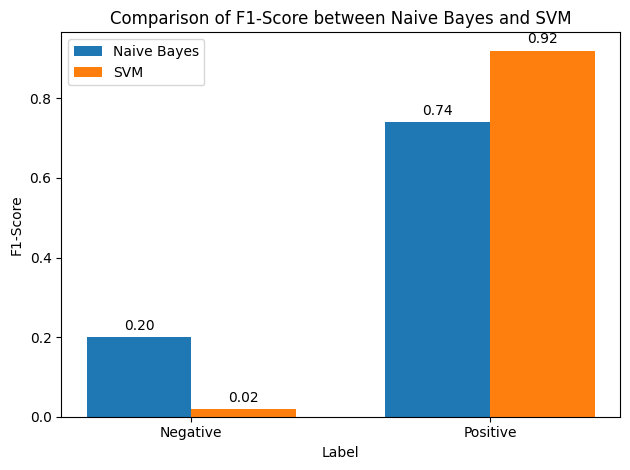

In [ ]:
# Grafik perbandingan f1-score

import matplotlib.pyplot as plt
import numpy as np

labels = ['Negative', 'Positive']
nb_f1_scores = [0.20, 0.74]
svm_f1_scores = [0.02, 0.92]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nb_f1_scores, width, label='Naive Bayes')
rects2 = ax.bar(x + width/2, svm_f1_scores, width, label='SVM')

ax.set_xlabel('Label')
ax.set_ylabel('F1-Score')
ax.set_title('Comparison of F1-Score between Naive Bayes and SVM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()